Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "Navi-21"

---

# Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. 

Получаемая таким образом квадратурная схема *точно* инегрирует $f(x)$ если это полином степени $m\le2n-1$, где $n$ - степень полинома, корни которого используются в качестве узлов.

## Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

    hint:Легко найти точки и веса для отрезка [-1,1], после чего можно сделать аффинное преобразование..

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [17]:
def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    # YOUR CODE HERE
    t1, t2 = -1 / 3**0.5, 1 / 3**0.5
    x1 = (a + b) / 2 + (b - a) * t1 / 2
    x2 = (a + b) / 2 + (b - a) * t2 / 2
    w1 = w2 = (b - a) / 2
    return  x1, x2, w1, w2 

In [18]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Использование ортогональных полиномов

### Legendre

Теперь посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками".

In [19]:
# YOUR CODE HERE
I = lambda x: (7 / 4) * x**4 - (8 / 3) * x**3 - (3 / 2) * x**2 + 3 * x
I(1) - I(-1)

0.6666666666666674

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в предыдущем дз). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [20]:
# YOUR CODE HERE
def midpoint_rule(func, a, b, n):
    h = (b - a) / n
    s = 0.0
    for i in range(n):
        s += func(a + 0.5 * h + i * h)

    return s * h

def trapezoid_rule(func, a, b, delta):
    n = 1
    h = (b - a) / n
    ans = 0.5 * h * (func(a) + func(b))
    err_est = 1
    while err_est > abs(delta * ans):
        old_ans = ans
        ans = 0.5 * (ans + midpoint_rule(func, a, b, n))
        n *= 2
        err_est = abs(ans - old_ans)
    return ans, n

f = lambda x: 7 * x ** 3 - 8 * x ** 2 - 3 * x + 3
I1, N = trapezoid_rule(f, -1, 1, delta = 10**(-10))

print('I =', I1, 'N =', N)

I = 0.6666666666569454 N = 1048576


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), с помощью Гауссовой квадратуры (используя корни полинома Лежандра степени от 1 до 6 в качестве узлов) (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [21]:
# YOUR CODE HERE
from scipy.special import roots_legendre

for i in range(1, 7):
    roots, weights = roots_legendre(i)
    print(i, (f(roots) * weights).sum())

1 6.0
2 0.6666666666666674
3 0.6666666666666639
4 0.6666666666666667
5 0.6666666666666685
6 0.6666666666666695


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

In [22]:
# YOUR CODE HERE
def quad_legendre(f, delta):
    ans, i = 10, 2/3
    k = 0
    while abs(ans - i) > i * delta:
        k += 1
        roots, weights = roots_legendre(k)
        ans = (f(roots) * weights).sum()
    return ans, k

for i in range(3, 14):
    delta = 10**(-i)
    I1, N1 = quad_legendre(f, delta)
    I2, N2 = trapezoid_rule(f, -1, 1, delta)
    print(delta, N1, N2)

0.001 2 256
0.0001 2 1024
1e-05 2 4096
1e-06 2 8192
1e-07 2 32768
1e-08 2 131072
1e-09 2 262144
1e-10 2 1048576
1e-11 2 4194304
1e-12 2 8388608
1e-13 2 33554432



Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [23]:
# YOUR CODE HERE


Сравните результат с точным значением интеграла.

YOUR ANSWER HERE

### 

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит машинное $\epsilon$.


In [25]:
# YOUR CODE HERE
from scipy.special import roots_chebyt
import numpy as np

f = lambda t: 0.5 * np.cos(2 * np.pi * t)
n = 2
ans = 0
I = 0.34601015881226444
while abs(I - ans) != 0:
    roots, weights = roots_chebyt(n)
    ans = (f(roots) * weights).sum()
    n += 1
I, n

(0.34601015881226443, 17)

# Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Рассматривая данное уравнение на тех же узлах сетки $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.


Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \cos(x)  + \frac{1}{2\pi} \int_0^\pi \! \sin(x) \,t f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2\pi}$, ядро $K(x, t) = \sin(x)\cdot t$ и правая часть - $g(x) = \cos(x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006):

$$
f(x) = \cos(x)- \frac{2}{\pi}\sin(x)
$$

Для нахождения интеграла преобразуйте заменой переменных в интеграле область интегрирования в [0,1] воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Напишите функцию, возвращающую значение f(t_j) по схеме выше, которая в качестве параметра принимает величину $N$--число узлов в квадратуре, для нахождение решения СЛАУ можно использовать `scipy.linalg.solve`.

Постройте график истинного решения и набор (t_j, f_j) для раличных $N$, используя вашу функцию.

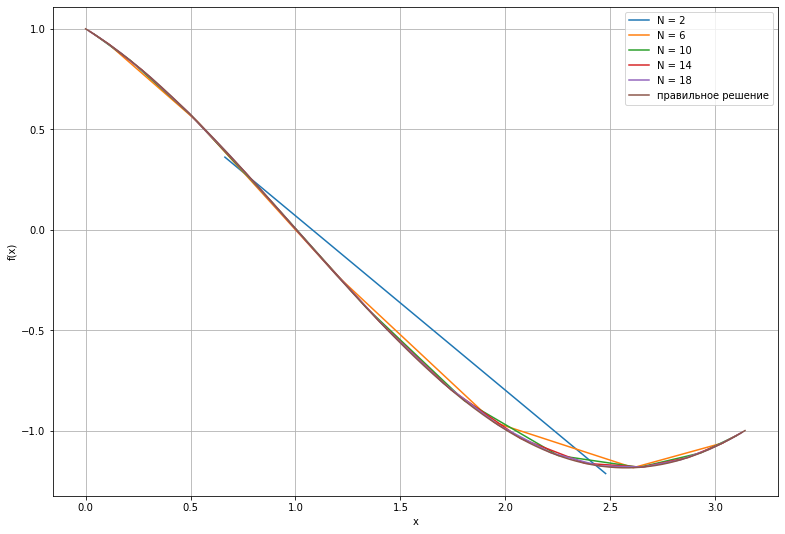

In [10]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import roots_sh_legendre
from scipy.linalg import solve

K = lambda x, t: np.sin(np.pi * x) * t
g = lambda x: np.cos(np.pi * x)

def func(N):
    roots, weights = roots_sh_legendre(N)
    I = np.eye(N)
    A = np.pi / 2 * np.asarray([weights * K(t_k, roots) for t_k in roots]) - I
    b = - g(roots)
    f = solve(A, b)
    return f


plt.figure(figsize=(13, 9))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


for N in range(2, 20, 4):
    roots, weights = roots_sh_legendre(N)
    x = roots * np.pi
    f = func(N)
    plt.plot(x, f, label=f'N = {N}')


f_t = lambda x: np.cos(x) - 2 / np.pi * np.sin(x)
x = np.linspace(0, np.pi, 200)
plt.plot(x, f_t(x), label='правильное решение')
plt.legend(loc="best")
plt.show()

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их расположение.

Оказывается, интерполяционные методы (мы обсудим их на следующих занятиях) работают не очень хорошо, в сравнении с следующим подходом:

Используйте изначальный вид, чтобы вычислить значение функции на всём интервале:

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным решением для разлиных $N$.
(выбирайте наглядный масштаб)

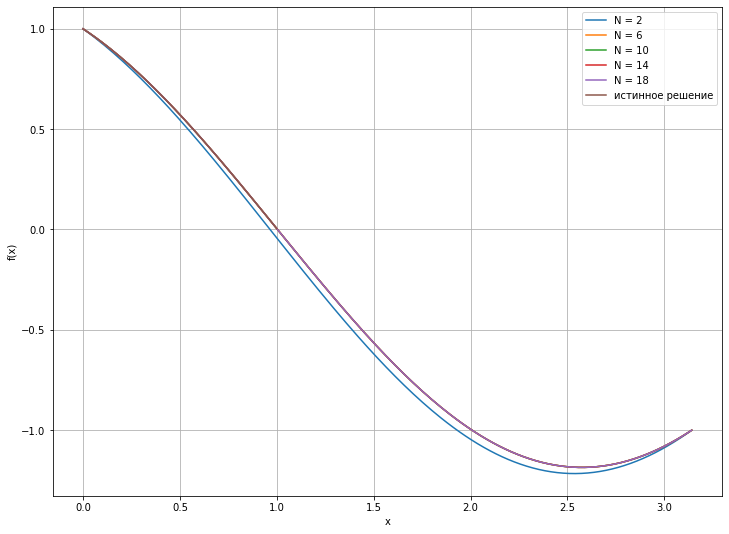

In [11]:
# YOUR CODE HERE
x = np.linspace(0, 1, 200)

plt.figure(figsize=(12, 9))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

for N in range(2, 20, 4):
    roots, weights = roots_sh_legendre(N)
    f_t = func(N)
    f = lambda x: g(x) + np.pi / 2 * (weights * K(x, roots) * f_t).sum()
    y = [f(i) for i in x]
    
    plt.plot(x*np.pi, y, label=f'N = {N}')

f_t = lambda x: np.cos(x) - 2 / np.pi * np.sin(x)
plt.plot(x, f_t(x), label='истинное решение')
plt.legend(loc="best")
plt.show()

# Часть 3. Интеграл от осциллирующей функции - EXTRA points task

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [26]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

C:\Users\79157\AppData\Local\Temp\ipykernel_8252\778045123.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))


(1.9653912540956702, 4.089174284042293)

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [ ]:
from scipy.integrate import quad

def integ():
    """Return a single float, the computed value of the integral."""
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
